<a href="https://colab.research.google.com/github/Serbeld/Practicas-de-Python/blob/master/Lectura_de_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Lectura de datasets**

####**Autor:** Sergio Luis Beleño Díaz

In [1]:
#Loading the dataset
!pip install h5py
import h5py

In [2]:
from google.colab import drive,files
drive.mount('/content/drive')

hdf5_path = '/content/drive/My Drive/Dataset_MD_Azim_to_TVD.hdf5'

dataset = h5py.File(hdf5_path, "r")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

#train
xt = np.array(dataset["input_entrenamiento"])
yt = np.array(dataset["output_entrenamiento"])

#Validation
xval = np.array(dataset["input_validacion"])
yval = np.array(dataset["output_validacion"])

#test
testX = np.array(dataset["input_testeo"])
testY = np.array(dataset["output_testeo"])

In [4]:
print("Training Shape: "+ str(xt.shape))
print("Validation Shape: "+ str(xval.shape))
print("Testing Shape: "+ str(testX.shape))

Training Shape: (56, 3)
Validation Shape: (12, 3)
Testing Shape: (13, 3)


In [5]:
#Neurona

#Inicialización de los pesos de la neurona
w = np.array([0.1, 0.1, 0.1])

#Tasa de aprendizaje
ta = 1e-12

entradas = xt
salida = yt

entrada_val = xval
salida_val = yval

entrada_test = testX
salida_test = testY

error_de_entrenamiento = []
error_de_validacion = []

error_train_acum = 0
error_val_acum = 0

######################################################################
######################################################################
for epocas in range(500):
  
  print("Época actual: " + str(epocas))
  
  for patron in range(len(entradas)):
    #Sumatoria entre la multiplicación de los pesos y las entradas
    sumatoria = np.dot(w, entradas[patron])
    
    #Función de activación lineal
    salida_obtenida = sumatoria
    
    #Error
    error = ta * (1/(len(entradas))) * ((salida[patron] - salida_obtenida) ** 2 )
    
    #acumula el error de entrenamiento
    error_train_acum = error_train_acum + error
    
    #Multiplicación entre las entradas y el error
    add = error * entradas[patron]
    
    #Ajuste de los pesos
    w = w + add
    
  print(w)
    
  #Validacion
  
  for patron in range(len(entrada_val)):
    
    #Sumatoria entre la multiplicación de los pesos y las entradas
    sumatoria_val = np.dot(w, entrada_val[patron])
    
    #Función de activación lineal
    salida_obtenida_val = sumatoria_val

    #Error de validación
    error_val = ta * (1/(len(entrada_val))) * ((salida_val[patron] - salida_obtenida_val) ** 2 )
    
    #acumula el error de entrenamiento
    error_val_acum = error_val_acum + error_val
  
  error_de_entrenamiento.append((error_train_acum/(len(entradas))))
  error_de_validacion.append((error_val_acum/(len(entrada_val))))
  
  error_train_acum = 0
  error_val_acum = 0


Época actual: 0
[0.10732619 0.10008057 0.10000279]
Época actual: 1
[0.11451036 0.10015954 0.10000552]
Época actual: 2
[0.12155662 0.10023698 0.1000082 ]
Época actual: 3
[0.12846891 0.10031292 0.10001083]
Época actual: 4
[0.13525102 0.1003874  0.10001341]
Época actual: 5
[0.14190663 0.10046047 0.10001595]
Época actual: 6
[0.14843923 0.10053216 0.10001844]
Época actual: 7
[0.15485223 0.10060252 0.10002088]
Época actual: 8
[0.16114889 0.10067158 0.10002328]
Época actual: 9
[0.16733235 0.10073938 0.10002564]
Época actual: 10
[0.17340565 0.10080595 0.10002796]
Época actual: 11
[0.17937173 0.10087132 0.10003024]
Época actual: 12
[0.1852334  0.10093552 0.10003248]
Época actual: 13
[0.19099339 0.10099859 0.10003468]
Época actual: 14
[0.19665434 0.10106056 0.10003685]
Época actual: 15
[0.20221879 0.10112145 0.10003897]
Época actual: 16
[0.2076892  0.10118129 0.10004107]
Época actual: 17
[0.21306793 0.1012401  0.10004313]
Época actual: 18
[0.21835728 0.10129792 0.10004515]
Época actual: 19
[0.22

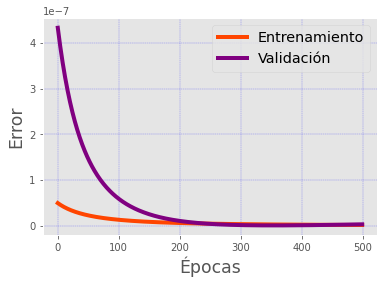

In [6]:
plt.figure(0)

plt.rcParams["figure.figsize"] = (8,5)

## explain
plt.style.use("ggplot")

plt.plot(error_de_entrenamiento,'orangered',linewidth=4)  
plt.plot(error_de_validacion,'purple',linewidth=4)  
plt.xlabel("Épocas",fontsize = 'xx-large')  
plt.ylabel("Error",fontsize = 'xx-large')  
#plt.title("Training Accuracy vs Validation Accuracy",fontsize = 'xx-large')

plt.grid(color='b', ls = '-.', lw = 0.2)
plt.legend(['Entrenamiento','Validación'],fontsize = 'x-large')

plt.show()

In [7]:
#MD de testeo
MD = entrada_test[:,0]
print("Los valores de testeo en MD son : " + str(MD))

#Azimuth de testeo
Azim = entrada_test[:,1]
print("Los valores de testeo en Azim son : " + str(Azim))

#Bias de testeo
Bias = entrada_test[:,2]
print("Los valores de testeo en Bias son : " + str(Bias))

Los valores de testeo en MD son : [4250. 4295. 4381. 4481. 4574. 4668. 4760. 4857. 4951. 5045. 5142. 5184.
 5245.]
Los valores de testeo en Azim son : [81.22 81.11 81.56 80.11 80.19 80.55 81.13 80.57 78.67 77.83 79.21 79.8
 79.8 ]
Los valores de testeo en Bias son : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
#TVD
TVD_real = salida_test
print("El TVD de testeo real es de: " + str(TVD_real))

El TVD de testeo real es de: [2733.20534497 2733.63729609 2732.81176984 2732.81176984 2734.09402155
 2734.2334715  2733.90430156 2735.53788634 2736.78475065 2736.02186255
 2734.9129384  2734.83963539 2735.00997818]


In [9]:
TVD_calculado_por_la_neurona = []

for patron in range(len(entrada_test)):
  
  #Sumatoria entre la multiplicación de los pesos y las entradas
  sumatoria = np.dot(w, entrada_test[patron])
  
  #Función de activación lineal
  salida_obtenida = sumatoria

  TVD_calculado_por_la_neurona.append(salida_obtenida)


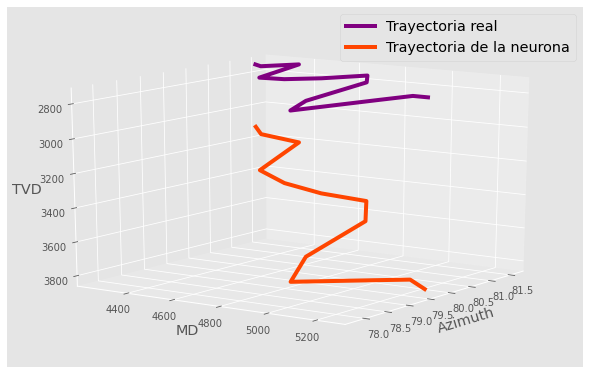

In [10]:
fig = plt.figure(1)
ax = Axes3D(fig)

ax.plot(Azim, MD, TVD_real, '-', linewidth=4, color='purple')
ax.plot(Azim, MD, TVD_calculado_por_la_neurona, '-', linewidth=4, color='orangered')

ax.set_xlabel('Azimuth', fontsize='x-large')
ax.set_ylabel('MD', fontsize='x-large')
ax.set_zlabel('TVD', fontsize='x-large')

#Orientación
ax.view_init(azim=-35, elev=-165)

plt.legend(['Trayectoria real', 'Trayectoria de la neurona'],
fontsize='x-large')

plt.show()

In [11]:
#MD de testeo
MD_entrenamiento = entradas[:,0]
print("Los valores de entrenamiento en MD son : " + str(MD))

#Azimuth de entrenamiento
Azim_entrenamiento = entradas[:,1]
print("Los valores de entrenamiento en Azim son : " + str(Azim))

#TVD real de entrenamiento
TVD_entrenamiento = salida

Los valores de entrenamiento en MD son : [4250. 4295. 4381. 4481. 4574. 4668. 4760. 4857. 4951. 5045. 5142. 5184.
 5245.]
Los valores de entrenamiento en Azim son : [81.22 81.11 81.56 80.11 80.19 80.55 81.13 80.57 78.67 77.83 79.21 79.8
 79.8 ]


In [12]:
TVD_calculado_por_la_neurona_entrenamiento = []

for patron in range(len(entradas)):
  
  #Sumatoria entre la multiplicación de los pesos y las entradas
  sumatoria = np.dot(w, entradas[patron])
  
  #Función de activación lineal
  salida_obtenida = sumatoria

  TVD_calculado_por_la_neurona_entrenamiento.append(salida_obtenida)

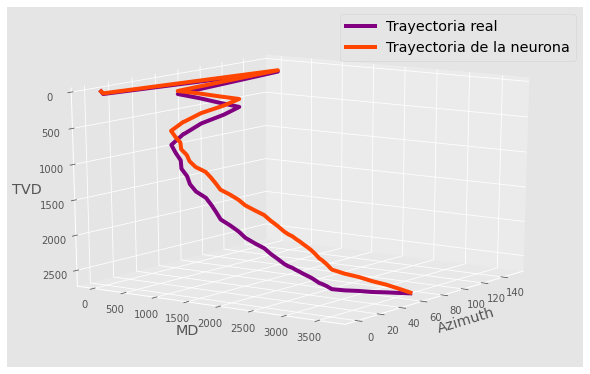

In [13]:
fig = plt.figure(2)
ax = Axes3D(fig)

ax.plot(Azim_entrenamiento, MD_entrenamiento, TVD_entrenamiento, '-', linewidth=4, color='purple')
ax.plot(Azim_entrenamiento, MD_entrenamiento, TVD_calculado_por_la_neurona_entrenamiento, '-', linewidth=4, color='orangered')

ax.set_xlabel('Azimuth', fontsize='x-large')
ax.set_ylabel('MD', fontsize='x-large')
ax.set_zlabel('TVD', fontsize='x-large')

#Orientación
ax.view_init(azim=-35, elev=-165)

plt.legend(['Trayectoria real', 'Trayectoria de la neurona'],
fontsize='x-large')

plt.show()